USING COLAB TO UPLOAD EXCEL FILE 

In [ ]:
# @author jonasdedeus

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mahasiswa.xlsx to Mahasiswa.xlsx


LIBRARY

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import random

READ AND WRITE DATA

In [ ]:
def import_from_xls(sid,inc,exp):
  allstudent = []
  for i in range (len(sid)):
    student = []
    j = 0
    while j < 3:
      if j == 0:
        student.append(sid[i])
      elif j == 1:
        student.append(inc[i]) 
      else:
        student.append(exp[i])
      j=j+1
    allstudent.append(student)
  return allstudent

def export_to_xls(selected):
  bantuan = []
  for i in range(0,20):
    slt = selected[i][0]
    bantuan.append(slt)
  df = DataFrame({
    'SID' : bantuan  
  })

  xlwriter = pd.ExcelWriter('Bantuan.xlsx')
  df.to_excel(xlwriter,sheet_name='bantuan',index = False)
  xlwriter.close()

FUZZIFICATION

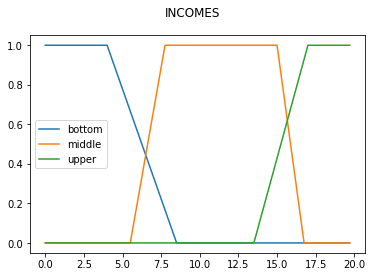

In [ ]:
inc = [[0, 0, 4.00, 8.5, 19.70, 19.70 ], [0, 5.50, 7.75 , 15, 16.75, 19.70], [0, 0, 13.50, 17, 19.70, 19.70]]

plt.plot(inc[0],[1,1,1,0,0,0],label="bottom")
plt.plot(inc[1],[0,0,1,1,0,0],label="middle")
plt.plot(inc[2],[0,0,0,1,1,1],label="upper")
plt.suptitle("INCOMES")
plt.legend()
plt.show()

In [ ]:
def income_up(x):
  if (x>13.50 and x<=17.00):
    return (x-13.50)/(17.00-13.50)
  elif (x>17.00):
    return 1
  else:
    return 0

def income_mid(x):
  if (x>15.00 and x<=16.75):
    return (16.75-x)/(16.75 - 15.00)
  elif (x>7.75 and x<=15.00):
    return 1
  elif (x>5.50 and x <=7.75):
    return (x-5.50)/(7.75-5.50)
  else:
      return 0

def income_btm(x):
  if (x>4.00 and x <=8.50):
    return (8.50-x)/(8.50-4.00)
  elif (x<=4.00):
    return 1
  else:
    return 0

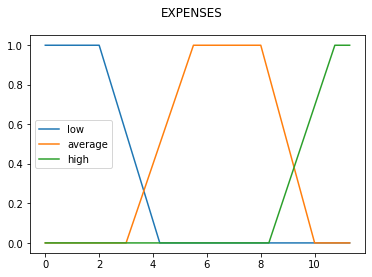

In [ ]:
exp = [[0, 0, 2.00, 4.25, 11.30, 11.30],[0, 3.00, 5.50, 8.00, 10.00, 11.30],[0, 0, 8.30, 10.75, 11.30, 11.30 ]]

plt.plot(exp[0],[1,1,1,0,0,0],label="low")
plt.plot(exp[1],[0,0,1,1,0,0],label="average")
plt.plot(exp[2],[0,0,0,1,1,1],label="high")
plt.suptitle("EXPENSES")
plt.legend()
plt.show()

In [ ]:
def expenses_high(x):
  if (x>8.30 and x <=10.75):
    return (x-8.30)/(10.75-8.30)
  elif (x>10.75):
    return 1
  else:
    return 0

def expenses_Avg(x):
  if (x>8.00 and x<=10.30):
    return (10.30-x)/(10.30-8.00)
  elif (x>5.00 and x<=8.00):
    return 1
  elif (x>3.00 and x<=5.00):
    return (x-3.00)/(5.00-3.00)
  else:
    return 0

def expenses_low(x):
  if (x>2.00 and x<=4.25):
    return (4.25-x)/(4.25-2.00)
  elif (x<=2.00):
    return 1
  else:
    return 0

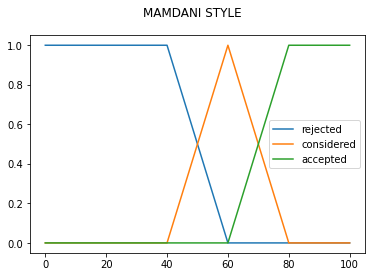

In [ ]:
mamdani = [[0, 0, 40, 60, 100],[0, 40, 60, 80, 100],[0, 0, 60, 80, 100]]

plt.plot(mamdani[0],[1,1,1,0,0,],label="rejected")
plt.plot(mamdani[1],[0,0,1,0,0],label="considered")
plt.plot(mamdani[2],[0,0,0,1,1],label="accepted")
plt.suptitle("MAMDANI STYLE")
plt.legend()
plt.show()

In [ ]:
def result_acpt(x):
  if (x>60 and x<80):
    return (x-60)/(80-60)
  elif (x>=80):
    return 1
  else:
    return 0

def result_cons(x):
  if (x>60 and x<=80):
    return (80-x)/(80-60)
  elif (x == 60):
    return 1
  elif (x>40 and x<60):
    return (x-40)/(60-40)
  else:
    return 0

def result_rej(x):
  if (x>40 and x<60):
    return (60-x)/(60-40)
  elif (x<=40):
    return 1
  else:
    return 0

INFERENCE

In [ ]:
def inference(ds):
  all_fuzzy = []
  for i in range(len(ds)):
    fuzzy = []
    fill = True
    while fill:
      x = ds[i][1]
      upper = income_up(x)
      middle = income_mid(x)
      bottom = income_btm(x)

      y = ds[i][2]
      high = expenses_high(y)
      average = expenses_Avg(y)
      low = expenses_low(y)

      accepted = max(min(upper,high),min(upper,average),min(upper,low),min(middle,low))
      considered = max(min(middle,high),min(middle,average),min(bottom,low))
      rejected =  max(min(bottom,average),min(bottom,high))

      fuzzy.append(accepted)
      fuzzy.append(considered)
      fuzzy.append(rejected)
      fill = False
    all_fuzzy.append(fuzzy)
  return all_fuzzy

DEFUZZIFICATION

In [ ]:
def def_mandami(ds):
  crisp = []
  i = 5
  while i < len(ds):
    crisp.append(i)
    i = i + 10
  return crisp

def def_method(fuz,rand,idx):
  sum_up,sum_getMax,get_max = 0,0,0
  for i in range (len(rand)):
    get_rand = rand[i]
    acc = result_cons(get_rand)
    cons = result_rej(get_rand)
    rej = result_rej(get_rand)
    get_max = max(min(acc,fuz[idx][0]),min(cons,fuz[idx][1]),min(rej,fuz[idx][2]))
    up = get_max*get_rand
    sum_up = sum_up + up
    sum_getMax = sum_getMax + get_max
  z = sum_up/sum_getMax
  return z 

def defuzzification(fuz,rand):
  finResult = []
  for i in range (len(fuz)):
    createList = []
    found = True
    while found:
      z = def_method(fuz,rand,i)
      createList.append(i+1)
      createList.append(z)
      found = False
    finResult.append(createList)
  return finResult

def sortResult(x):
  return x[1]

MAIN FUNCTION

In [ ]:
student = pd.read_excel('Mahasiswa.xlsx')

sid = student['Id'].values.tolist()
print(sid)
income = student['Penghasilan'].values.tolist()
expense = student['Pengeluaran'].values.tolist()
data_student = import_from_xls(sid,income,expense)
fuz = inference(data_student)
rand = def_mandami(data_student)
selected = defuzzification(fuz,rand)
selected.sort(reverse=True,key=sortResult)
print("The selected students are: ")
print("SID------>Result ")
for i in range(20):
  print(selected[i][0],"------->",selected[i][1])
export_to_xls(selected)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
The selected students are: 
SID------>Result 
1 -------> 60.00000000000001
44 -------> 60.00000000000001
3 -------> 60.0
5 -------> 60.0
8 -------> 60.0
9 -------> 60.0
10 -------> 60.0
15 -------> 60.0
20 -------> 60.0
22 -------> 60.0
24 -------> 60.0
28 -------> 60.0
29 -------> 60.0
30 -------> 60.0
31 -------> 60.0
34 -------> 60.0
35 -------> 60.0
45 -------> 60.0
57 -------> 60.0
58 -------> 60.0
